In [1]:
import pandas as pd
from final_project.data.data import load_data, summarise_data, date_cleaning, float_to_integer 
from final_project.visualisations.visualisations import plot_histogram 

# EDA Stage 1


### Raw Dataset 

In [2]:
df_raw = load_data()
print(df_raw.head())
print(df_raw.shape)


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

### Summarising the Raw Dataset

In [3]:
summary = summarise_data(df_raw)
print(summary)


                 dtype  n_missing  pct_missing  n_unique           max  \
Address         object          0        0.000     13378           NaN   
Bathroom       float64          0        0.000         9  8.000000e+00   
Bedroom2       float64          0        0.000        12  2.000000e+01   
BuildingArea   float64       6450        0.475       602  4.451500e+04   
Car            float64         62        0.005        11  1.000000e+01   
CouncilArea     object       1369        0.101        33           NaN   
Date            object          0        0.000        58           NaN   
Distance       float64          0        0.000       202  4.810000e+01   
Landsize       float64          0        0.000      1448  4.330140e+05   
Lattitude      float64          0        0.000      6503 -3.740853e+01   
Longtitude     float64          0        0.000      7063  1.455264e+02   
Method          object          0        0.000         5           NaN   
Postcode       float64          0     

* dropping Address since it is a string identifier rather than a feature 
* dropping seller agent as it is highly cardinal and could cause overfitting 

In [4]:
df_raw = df_raw.drop(columns=["Address", "SellerG"])

### Converting Date column to datetime type

In [5]:
df_raw = date_cleaning(df_raw)
print(df_raw[["Year","Month","Day"]].head())
print(df_raw["Year"].unique())

   Year  Month  Day
0  2016     12    3
1  2016      2    4
2  2017      3    4
3  2017      3    4
4  2016      6    4
[2016 2017]


* Turning Year into binary feature (2016 is 0 and 2017 is 1) since there are only two years

In [6]:
df_raw["Year_binary"] = df_raw["Year"].map({2016: 0, 2017: 1})
df_raw = df_raw.drop(columns=["Year"])
print(df_raw[["Year_binary","Month","Day"]].head())

   Year_binary  Month  Day
0            0     12    3
1            0      2    4
2            1      3    4
3            1      3    4
4            0      6    4


### Correcting Data Types (Postcode and Build Year)

In [7]:
df_raw = float_to_integer(df_raw, "Postcode")
df_raw = float_to_integer(df_raw, "YearBuilt")
print(df_raw[["Postcode","YearBuilt"]].dtypes)

Postcode     Int64
YearBuilt    Int64
dtype: object


### Analysing the distribution of the target variable: Prices

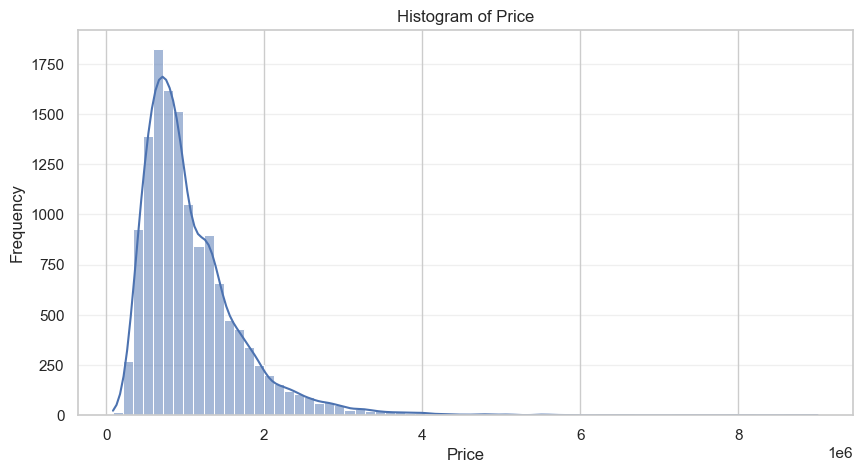

In [28]:
plot_histogram(df_raw,"Price", bins=70)

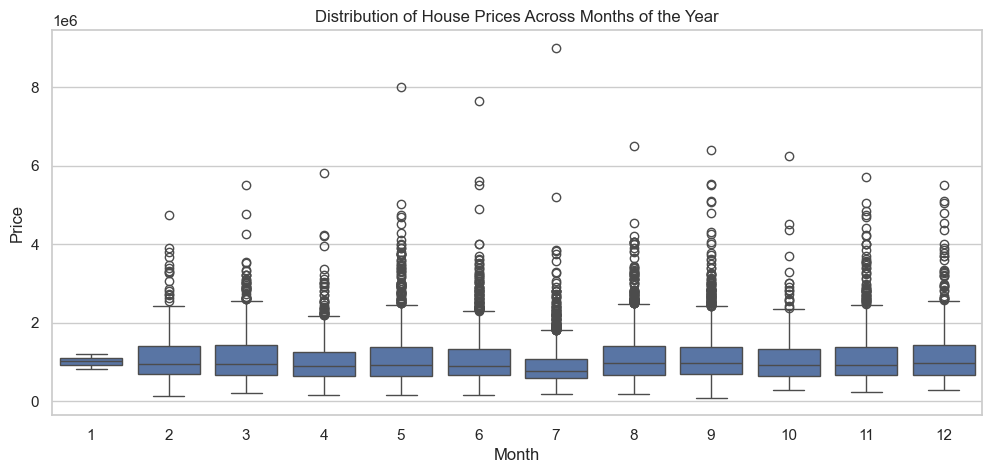

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 5))
sns.boxplot(
    x="Month",
    y="Price",
    data=df_raw,
)

plt.title("Distribution of House Prices Across Months of the Year")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()


* 

Text(0.5, 1.0, 'Spatial Distribution of House Prices')

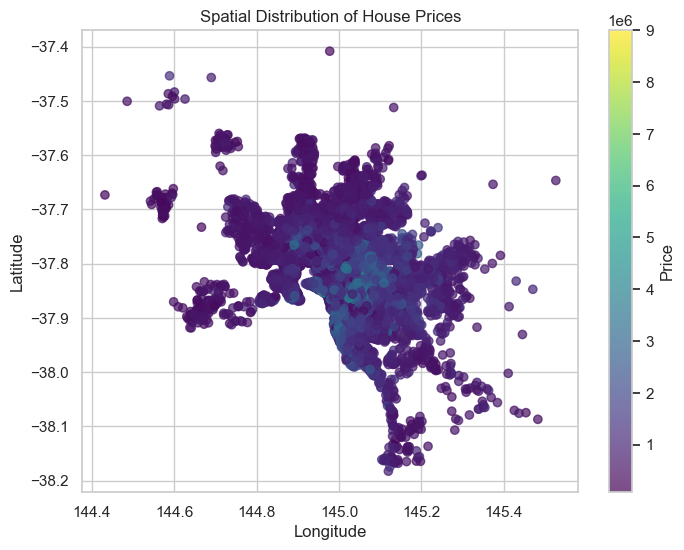

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(df_raw["Longtitude"], df_raw["Lattitude"], c=df_raw["Price"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of House Prices")


Text(0.5, 1.0, 'Price vs Latitude')

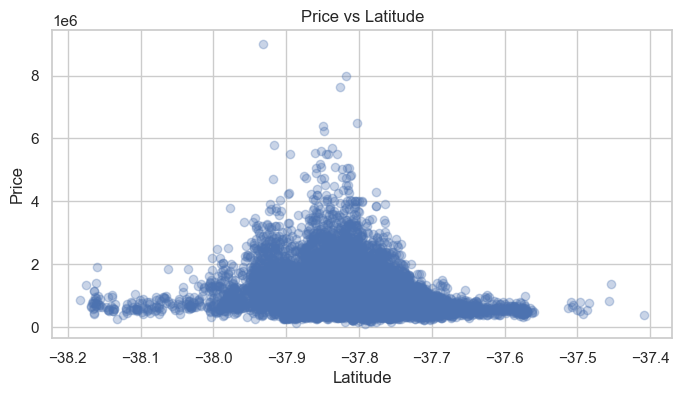

In [31]:
plt.figure(figsize=(8,4))
plt.scatter(df_raw["Lattitude"], df_raw["Price"], alpha=0.3)
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.title("Price vs Latitude")


Text(0.5, 1.0, 'Price vs Longitude')

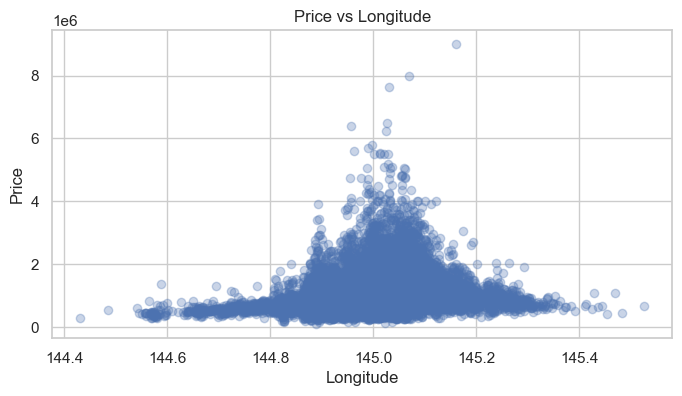

In [32]:
plt.figure(figsize=(8,4))
plt.scatter(df_raw["Longtitude"], df_raw["Price"], alpha=0.3)
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.title("Price vs Longitude")